In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
filepath = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive/


In [2]:
!pip install cobra

In [3]:
import cobra
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from cobra import Reaction, Model, Metabolite

LL = cobra.io.read_sbml_model(os.path.join(filepath, 'B2P Models/Thaps_LL.xml'))
ML = cobra.io.read_sbml_model(os.path.join(filepath, 'B2P Models/Thaps_ML.xml'))
HL = cobra.io.read_sbml_model(os.path.join(filepath, 'B2P Models/Thaps_HL.xml'))

models = [LL,ML,HL]

# adding transport reactions

In [5]:
metabolite_to_add_to_e = [
    {'id': 'dgsn', 'compartment': 'c'},
    {'id': '4abz', 'compartment': 'm'},
    {'id': 'ump', 'compartment': 'c'},
    {'id': '4abut', 'compartment': 'c'},
    {'id': '4ahmmp', 'compartment': 'c'},
    {'id': 'adn', 'compartment': 'c'},
    {'id': '4aammp', 'compartment': 'c'},
    {'id': 'arg__L', 'compartment': 'c'},
    {'id': 'chtbs', 'compartment': 'c'},
    {'id': 'Lcyst', 'compartment': 'c'},
    {'id': 'cys__L', 'compartment': 'c'},
    {'id': 'cytd', 'compartment': 'c'},
    {'id': 'g6p', 'compartment': 'c'},
    {'id': 'gthrd', 'compartment': 'c'},
    {'id': 'gsn', 'compartment': 'c'},
    {'id': 'hom__L', 'compartment': 'c'},
    {'id': 'lys__L', 'compartment': 'c'},
    {'id': 'met__L', 'compartment': 'c'},
    {'id': 'phe__L', 'compartment': 'c'},
    {'id': 'ptrc', 'compartment': 'c'},
    {'id': 'sarcs', 'compartment': 'c'},
    {'id': 'glyc3p', 'compartment': 'c'},
    {'id': 'trp__L', 'compartment': 'c'},
    {'id': 'tyr__L', 'compartment': 'c'},
    {'id': 'uri', 'compartment': 'c'}

]

for model in models:
    for met in metabolite_to_add_to_e:
        id = met['id']
        compart = met['compartment']

        internal_id = f'{id}_{compart}'
        external_id = f'{id}_e'

        # Create the external metabolite
        external_metabolite = Metabolite(external_id, name=id, compartment='e')

        # Retrieve the internal metabolite
        internal_metabolite = model.metabolites.get_by_id(internal_id)

        # Create the transport reaction
        transport_reaction = Reaction(f'{id}_e_transport')
        transport_reaction.add_metabolites({
            internal_metabolite: -1,
            external_metabolite: 1
        })
        transport_reaction.lower_bound = -1000
        transport_reaction.upper_bound = 1000

        # Add the transport reaction to the model
        model.add_reactions([transport_reaction])

        # Add the exchange reaction for the external metabolite
        exchange_reaction = model.add_boundary(external_metabolite, type="exchange")
        exchange_reaction.lower_bound = 0
        exchange_reaction.upper_bound = 1000

        # Check if the exchange reaction was added and its bounds
        assert exchange_reaction.lower_bound == 0, f"{exchange_reaction.id} has incorrect lower bound."
        assert exchange_reaction.upper_bound == 1000, f"{exchange_reaction.id} has incorrect upper bound."
       # print(f"Added exchange reaction: {exchange_reaction.id} with bounds ({exchange_reaction.lower_bound}, {exchange_reaction.upper_bound})")

In [6]:
exchange_reaction_id = 'EX_adn_e'
exchange_reaction = model.reactions.get_by_id(exchange_reaction_id)

# Get the bounds of the exchange reaction
lower_bound = exchange_reaction.lower_bound
upper_bound = exchange_reaction.upper_bound

# Get additional information about the exchange reaction
reaction_info = {
    "ID": exchange_reaction.id,
    "Name": exchange_reaction.name,
    "Reaction": exchange_reaction.reaction,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound,
    "Subsystem": exchange_reaction.subsystem,
    "Gene Reaction Rule": exchange_reaction.gene_reaction_rule,
    "Metabolites": [(met.id, met.formula, coeff) for met, coeff in exchange_reaction.metabolites.items()]
}

# Print the exchange reaction details
print("Exchange Reaction Details:")
for key, value in reaction_info.items():
    print(f"{key}: {value}")

Exchange Reaction Details:
ID: EX_adn_e
Name: adn exchange
Reaction: adn_e --> 
Lower Bound: 0
Upper Bound: 1000
Subsystem: 
Gene Reaction Rule: 
Metabolites: [('adn_e', None, -1)]


In [7]:
for model in models:
  print(model.exchanges)

[<Reaction EX_co2_e at 0x7d37138d0ee0>, <Reaction EX_hco3_e at 0x7d37138bafb0>, <Reaction EX_no2_e at 0x7d37138badd0>, <Reaction EX_no3_e at 0x7d37120e3dc0>, <Reaction EX_nh4_e at 0x7d3711a67d00>, <Reaction EX_btn_e at 0x7d3711a67fd0>, <Reaction EX_fe2_e at 0x7d37138d0c70>, <Reaction EX_h_e at 0x7d37138d3e50>, <Reaction EX_h2o_e at 0x7d37138d2140>, <Reaction EX_o2_e at 0x7d37138f8af0>, <Reaction EX_pi_e at 0x7d37138f8ee0>, <Reaction EX_na1_e at 0x7d37138fb8b0>, <Reaction EX_so4_e at 0x7d37138f97b0>, <Reaction EX_mg2_e at 0x7d37138f84c0>, <Reaction EX_glyclt_e at 0x7d3713921b40>, <Reaction EX_selt_e at 0x7d3713921870>, <Reaction EX_cl_e at 0x7d37139222f0>, <Reaction EX_thm_e at 0x7d37139228c0>, <Reaction EX_fol_e at 0x7d37139237f0>, <Reaction EX_co_e at 0x7d3713922f20>, <Reaction EX_cyan_e at 0x7d3713920f70>, <Reaction EX_cynt_e at 0x7d3713920220>, <Reaction EX_tcynt_e at 0x7d3713749600>, <Reaction EX_lac__D_e at 0x7d3713749840>, <Reaction EX_etoh_e at 0x7d371374a110>, <Reaction EX_urea

In [8]:
solutions = []
for model in models:
    solution = model.optimize()
    solutions.append((model.name, solution))
for model_name, solution in solutions:
    print(f'solution for model {model_name}:')
    print(solution)
    print('status =', solution.status)

solution for model Thalassiosira pseudonana CCMP 1335, acclimated to 5 umol photons m-2 s-1:
<Solution 0.008 at 0x7d374f6979d0>
status = optimal
solution for model Thalassiosira pseudonana CCMP 1335, acclimated to 60 umol photons m-2 s-1:
<Solution 0.035 at 0x7d370ce84550>
status = optimal
solution for model Thalassiosira pseudonana CCMP 1335, acclimated to 200 umol photons m-2 s-1:
<Solution 0.064 at 0x7d370ce86710>
status = optimal


In [9]:
# getting flux solutions for non-photon only

non_photon_ex_flux_data = {}

for model in models:
    solution = model.optimize()

    ex_reactions = [rxn for rxn in model.reactions if rxn.id.startswith('EX_')]
    non_photon_ex_reactions = [rxn for rxn in ex_reactions if 'photon' not in rxn.name.lower()]
    non_photon_ex_fluxes = {rxn.id: solution.fluxes[rxn.id] for rxn in non_photon_ex_reactions}

    for rxn_id, flux in non_photon_ex_fluxes.items():
        if rxn_id not in non_photon_ex_flux_data:
            non_photon_ex_flux_data[rxn_id] = {}
        non_photon_ex_flux_data[rxn_id][model.name] = flux

    print(f'non_photon fluxes for model {model.name}:')
    for rxn_id, flux in non_photon_ex_fluxes.items():
      print(f'{rxn_id}:{flux}')

df = pd.DataFrame(non_photon_ex_flux_data).T

non_photon fluxes for model Thalassiosira pseudonana CCMP 1335, acclimated to 5 umol photons m-2 s-1:
EX_co2_e:-0.25675252333370446
EX_hco3_e:0.0
EX_no2_e:0.0
EX_no3_e:-0.0650099184666713
EX_nh4_e:0.005583687703165449
EX_btn_e:0.0
EX_fe2_e:0.0
EX_h_e:-0.11350701365963645
EX_h2o_e:-0.11233534702735751
EX_o2_e:0.3984123449624061
EX_pi_e:0.01196720627001306
EX_na1_e:4.0562842823500437e-17
EX_so4_e:-0.001722313856431167
EX_mg2_e:-0.0002685432518468971
EX_glyclt_e:0.0
EX_selt_e:0.0
EX_cl_e:0.0
EX_thm_e:0.0
EX_fol_e:1.533532191977533e-19
EX_co_e:0.0
EX_cyan_e:0.0
EX_cynt_e:0.0
EX_tcynt_e:0.0
EX_lac__D_e:0.0
EX_etoh_e:0.0
EX_urea_e:0.0
EX_cncbl3_e:0.0
EX_dmsp_e:0.0
EX_glyb_e:0.0
EX_Nactaur_e:0.0
EX_aqcobal_e:0.0
EX_frmd_e:0.0
EX_urate_e:0.0
EX_ac_e:0.0
EX_chol_e:0.0
EX_ura_e:0.0
EX_xan_e:0.0
EX_uacgam_e:0.0
EX_glu__L_e:0.0
EX_asp__L_e:0.0
EX_dhps_e:0.0
EX_for_e:0.0
EX_ile__L_e:0.0
EX_leu__L_e:0.0
EX_val__L_e:0.0
EX_asn__L_e:0.0
EX_ala__L_e:0.0
EX_gln__L_e:0.0
EX_his__L_e:0.0
EX_ser__L_e:0.0
E

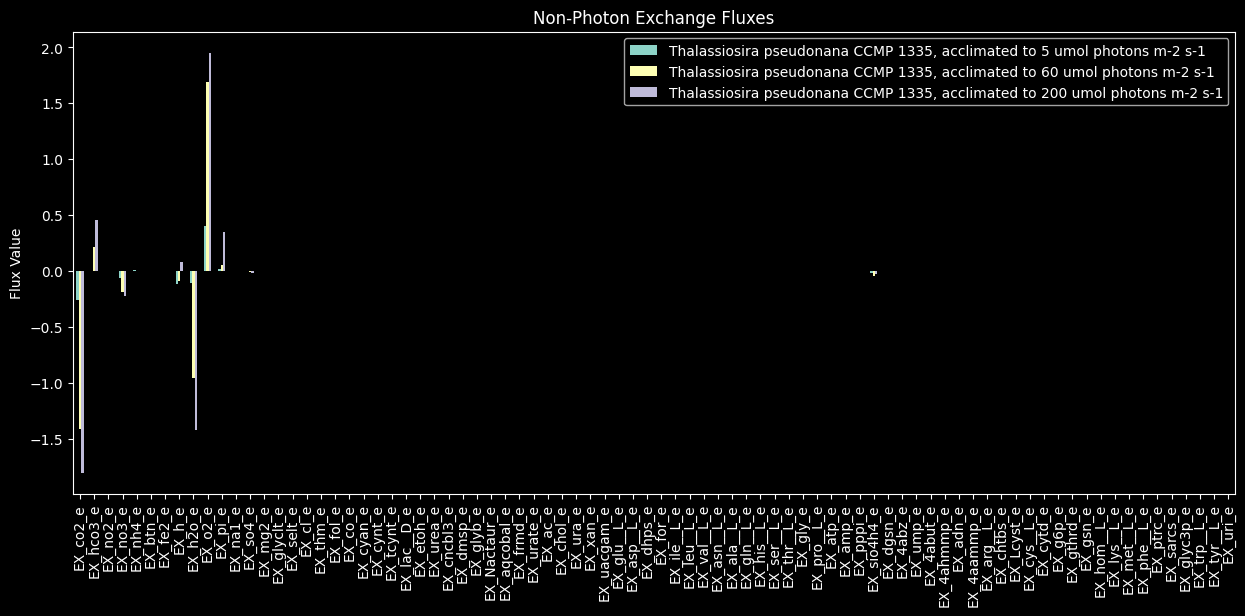

In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
df.plot(kind='bar', figsize=(15, 6))
plt.ylabel('Flux Value')
plt.title('Non-Photon Exchange Fluxes')
plt.legend()
plt.show()

In [11]:
summaries = []
for model in models:
    summary = model.summary()
    summaries.append((model.name, summary))

for model_name, summary in summaries:
    print(f'Summary for model {model_name}:')
    print(summary)

Summary for model Thalassiosira pseudonana CCMP 1335, acclimated to 5 umol photons m-2 s-1:
Objective
1.0 DM_biomass_c = 0.00834530656807609

Uptake
------
 Metabolite       Reaction      Flux  C-Number C-Flux
      co2_e       EX_co2_e    0.2568         1 85.62%
      h2o_e       EX_h2o_e    0.1068         0  0.00%
        h_e         EX_h_e    0.1023         0  0.00%
      mg2_e       EX_mg2_e 0.0002685         0  0.00%
      no3_e       EX_no3_e   0.05943         0  0.00%
photon410_e EX_photon410_e     7.998         0  0.00%
photon430_e EX_photon430_e     16.86         0  0.00%
photon450_e EX_photon450_e     11.21         0  0.00%
photon470_e EX_photon470_e     10.02         0  0.00%
photon490_e EX_photon490_e      16.9         0  0.00%
photon510_e EX_photon510_e     7.624         0  0.00%
photon530_e EX_photon530_e      7.08         0  0.00%
photon550_e EX_photon550_e     24.68         0  0.00%
photon570_e EX_photon570_e     4.603         0  0.00%
photon590_e EX_photon590_e     5.6

/usr/local/lib/python3.10/dist-packages/cobra/core/metabolite.py:146: UserWarning: 36.0123545347 is not an integer (in formula C36.0123545347H56.524462604Si2.84689396704Mg0.0321789558766O19.680699809N7.12355926218P0.273914631501S0.206658779195)
  warn(f"{count} is not an integer (in formula {self.formula})")
/usr/local/lib/python3.10/dist-packages/cobra/core/metabolite.py:146: UserWarning: 56.524462604 is not an integer (in formula C36.0123545347H56.524462604Si2.84689396704Mg0.0321789558766O19.680699809N7.12355926218P0.273914631501S0.206658779195)
  warn(f"{count} is not an integer (in formula {self.formula})")
/usr/local/lib/python3.10/dist-packages/cobra/core/metabolite.py:146: UserWarning: 2.84689396704 is not an integer (in formula C36.0123545347H56.524462604Si2.84689396704Mg0.0321789558766O19.680699809N7.12355926218P0.273914631501S0.206658779195)
  warn(f"{count} is not an integer (in formula {self.formula})")
/usr/local/lib/python3.10/dist-packages/cobra/core/metabolite.py:146: U